# Walmart Case Study

Problem Statement
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\CaseStudies\Walmart\walmart_data.csv')

## Dataset

The company collected the transactional data of customers who purchased products from ehWalmart Store during Black Friday.
d. The dataset has the followi features :

-  User_ID: User ID
  
-  Product_ID: Product ID

-  Gender: Sex of User

-  Age: Age in bins

-  Occupation: Occupation(Masked)

-  City_Category: Category of the city (A,B,C)

-  StayInCurrentCityYears:	Number of years stay in current city

-  Marital_Status:	Marital Status

-  ProductCategory:	Product Category (Masked)

-  Purchase:	Purchase Amount
Amountnt

## Data Audit

In [3]:
df.head

<bound method NDFrame.head of        User_ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00069042      F   0-17        10.0             A   
1      1000001  P00248942      F   0-17        10.0             A   
2      1000001  P00087842      F   0-17        10.0             A   
3      1000001  P00085442      F   0-17        10.0             A   
4      1000002  P00285442      M    55+        16.0             C   
...        ...        ...    ...    ...         ...           ...   
25032  1003843  P00034642      F   0-17        10.0             B   
25033  1003844  P00359942      M  18-25         4.0             C   
25034  1003844  P00193842      M  18-25         4.0             C   
25035  1003845  P00110942      M  26-35        12.0             C   
25036  1003845      P0022    NaN    NaN         NaN           NaN   

      Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                              2             0.0              

In [4]:
df.shape

(25037, 10)

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     25037 non-null  int64  
 1   Product_ID                  25037 non-null  object 
 2   Gender                      25036 non-null  object 
 3   Age                         25036 non-null  object 
 4   Occupation                  25036 non-null  float64
 5   City_Category               25036 non-null  object 
 6   Stay_In_Current_City_Years  25036 non-null  object 
 7   Marital_Status              25036 non-null  float64
 8   Product_Category            25036 non-null  float64
 9   Purchase                    25036 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.503700e+04,25036.000000,25036.000000,25036.000000,25036.000000
mean,1.001944e+06,8.254593,0.399545,5.302604,9240.939647
std,1.124044e+03,6.533908,0.489815,3.705730,4937.285195
min,1.000001e+06,0.000000,0.000000,1.000000,186.000000
25%,1.001015e+06,3.000000,0.000000,1.000000,5837.750000
50%,1.001884e+06,7.000000,0.000000,5.000000,8044.000000
75%,1.002952e+06,14.000000,1.000000,8.000000,11997.500000
max,1.003845e+06,20.000000,1.000000,18.000000,23958.000000


In [8]:
df['Age'].value_counts()

Age
26-35    9826
18-25    5100
36-45    4839
46-50    1844
51-55    1738
55+       990
0-17      699
Name: count, dtype: int64

In [9]:
df['City_Category'].value_counts()

City_Category
B    10609
C     7457
A     6970
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
M    19139
F     5897
Name: count, dtype: int64

In [11]:
df['Marital_Status'].value_counts()

Marital_Status
0.0    15033
1.0    10003
Name: count, dtype: int64

In [12]:
df['Occupation'].value_counts()

Occupation
4.0     3466
0.0     3110
7.0     2713
17.0    1904
1.0     1823
20.0    1710
12.0    1518
2.0     1163
14.0    1145
16.0    1036
3.0      890
6.0      842
10.0     660
11.0     580
15.0     529
5.0      471
13.0     414
19.0     407
9.0      301
18.0     262
8.0       92
Name: count, dtype: int64

In [13]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     8687
3     4521
2     4500
4+    3966
0     3362
Name: count, dtype: int64

## NULL values and Outlier Detection

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [15]:
df[df['Gender'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df[df['User_ID'] == 1003845]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25035,1003845,P00110942,M,26-35,12.0,C,1,1.0,1.0,19456.0
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df[(df['Product_ID'] == 'P0022')&(df['User_ID'] == 1003845)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.drop(index=25036,inplace=True)                        #Removed the data with Null Values

In [19]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

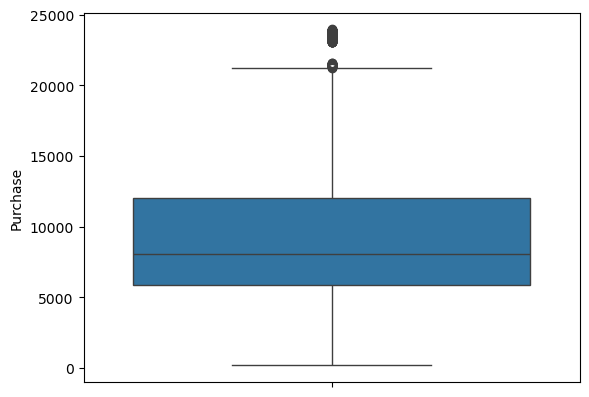

In [20]:
sns.boxplot(df['Purchase'])
plt.show()

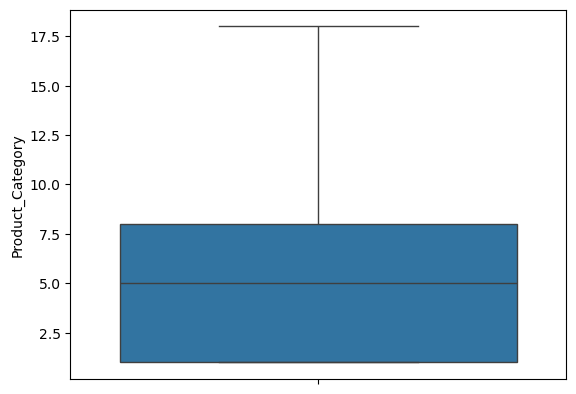

In [21]:
sns.boxplot(df['Product_Category'])
plt.show()

We can observer lots of outliers with respect to the Purchase(Amount)

## Univariate and Bivarite Analysis

### Univarite Analysis

In [22]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

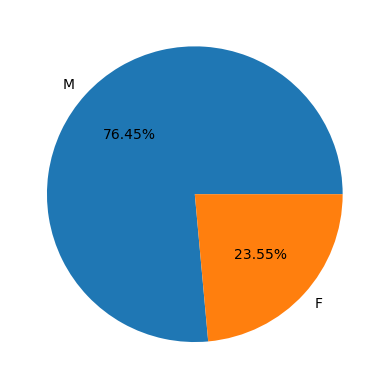

In [23]:
plt.pie(df['Gender'].value_counts() , labels=df['Gender'].value_counts().index , autopct= "%.2f%%")
plt.show()

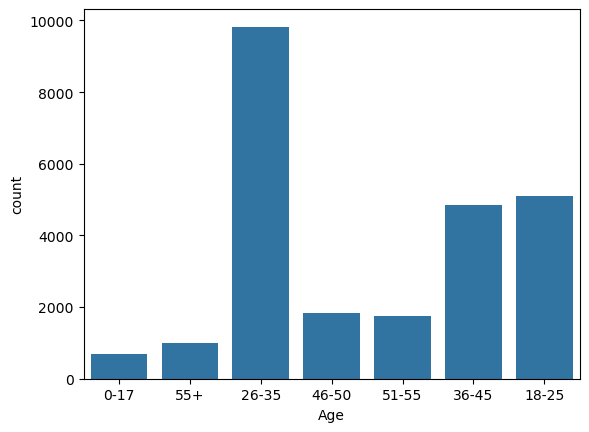

In [24]:
sns.countplot(x = df['Age'])
plt.show()

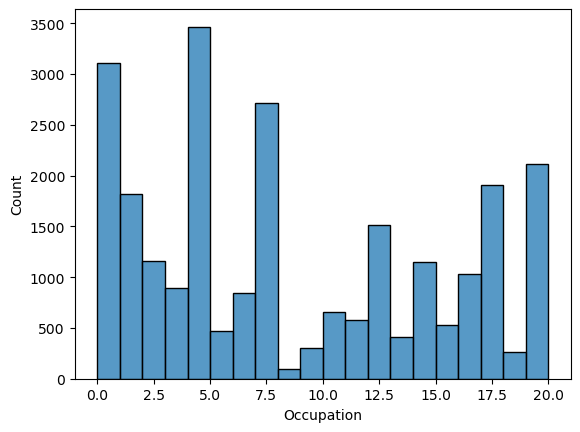

In [25]:
sns.histplot(df['Occupation'] , bins=20)
plt.show()

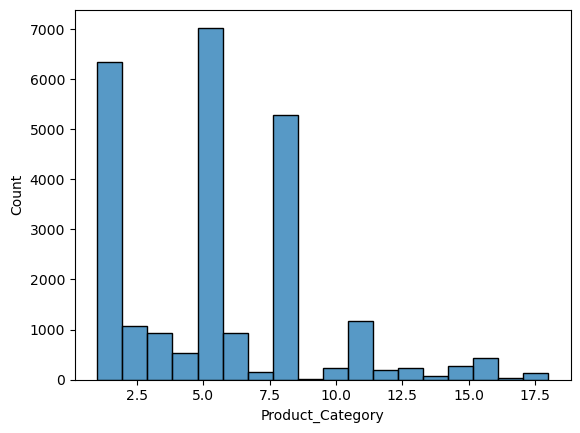

In [26]:
sns.histplot(df['Product_Category'], bins = 18)
plt.show()

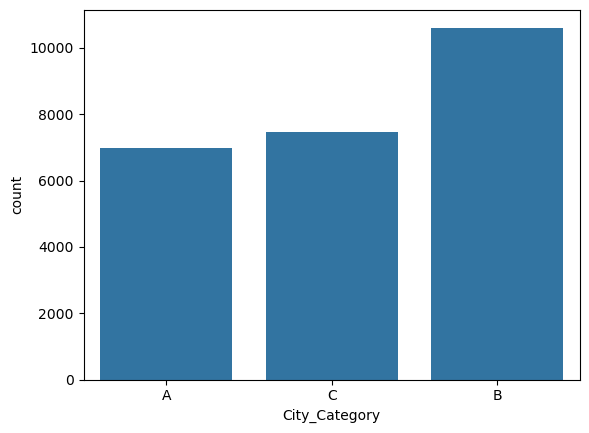

In [27]:
sns.countplot(x = df['City_Category'])
plt.show()

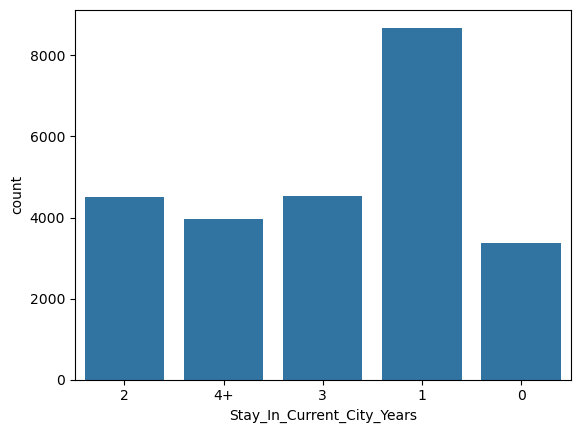

In [28]:
sns.countplot(x = df['Stay_In_Current_City_Years'])
plt.show()

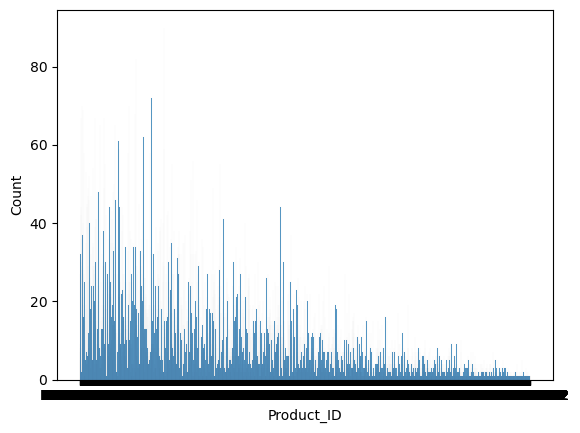

In [29]:
sns.histplot(df['Product_ID'] , bins=2820)
plt.show()

### Bivariate Analysis

In [30]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [31]:
df['Product_ID'].nunique()

2820

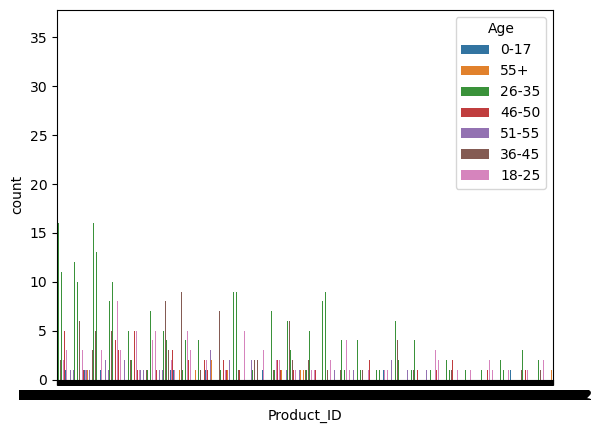

In [32]:
sns.countplot(x = df['Product_ID'] , hue = df['Age'] )
plt.show()

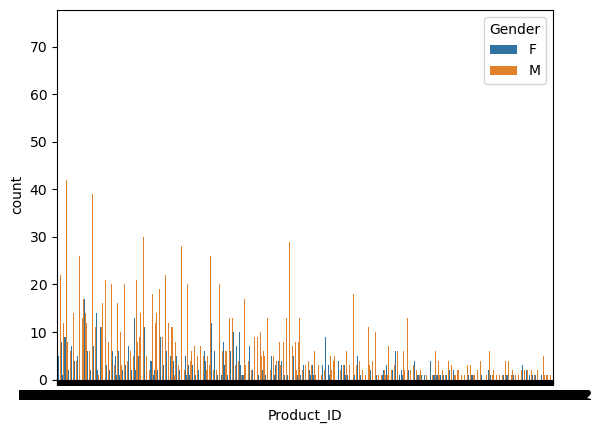

In [33]:
sns.countplot(x = df['Product_ID'] , hue = df['Gender'])
plt.show()

In [135]:
productCategory_age = df[['Product_Category','Age']]
productCategory_age.head()

,Product_Category,Age
0,3.0,0-17
1,1.0,0-17
2,12.0,0-17
3,12.0,0-17
4,8.0,55+


In [35]:
productCategory_age['Age'].value_counts()

Age
26-35    9826
18-25    5100
36-45    4839
46-50    1844
51-55    1738
55+       990
0-17      699
Name: count, dtype: int64

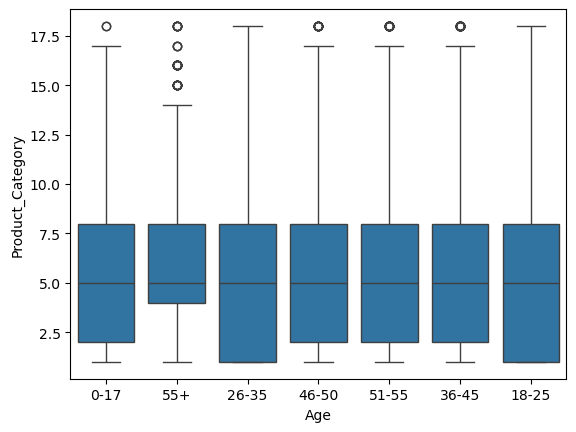

In [36]:
sns.boxplot(x=df['Age'],y=df['Product_Category'])
plt.show()

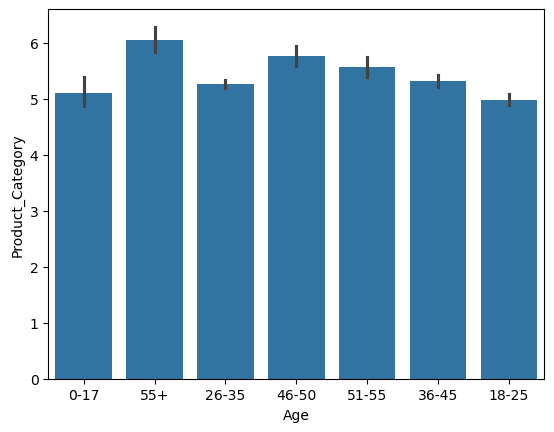

In [37]:
sns.barplot(x=df['Age'],y=df['Product_Category'])
plt.show()

In [38]:
productCategory_gender = df[['Product_Category','Gender']]
productCategory_gender

,Product_Category,Gender
0,3.0,F
1,1.0,F
2,12.0,F
3,12.0,F
4,8.0,M
...,...,...
25031,5.0,F
25032,4.0,F
25033,11.0,M
25034,11.0,M


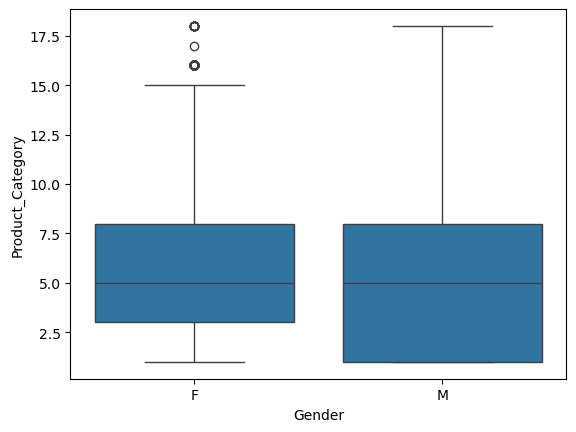

In [39]:
sns.boxplot(x = df['Gender'] , y = df['Product_Category'])
plt.show()

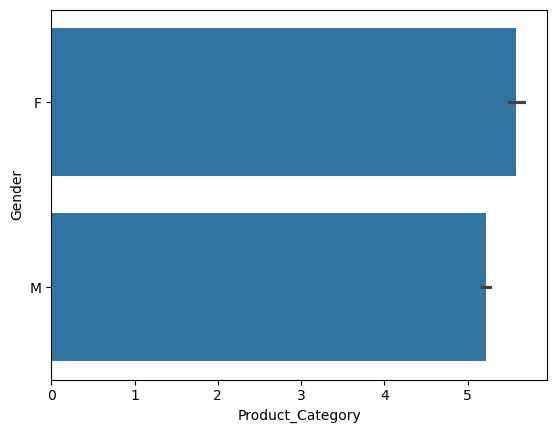

In [40]:
sns.barplot(x=df['Product_Category'],y=df['Gender'])
plt.show()

In [41]:
productCategory_city = df[['Product_Category','City_Category']]
productCategory_city

,Product_Category,City_Category
0,3.0,A
1,1.0,A
2,12.0,A
3,12.0,A
4,8.0,C
...,...,...
25031,5.0,B
25032,4.0,B
25033,11.0,C
25034,11.0,C


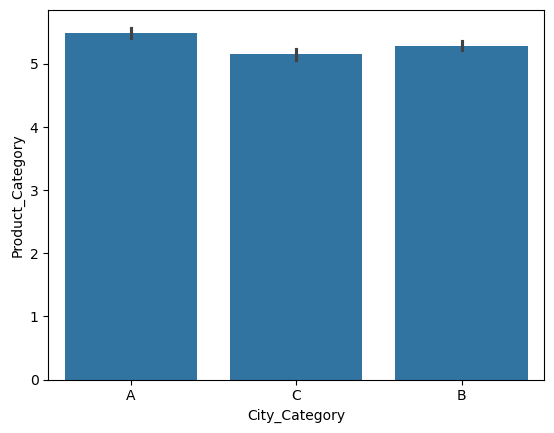

In [42]:
sns.barplot(x= productCategory_city['City_Category'] , y= productCategory_city['Product_Category'])
plt.show()

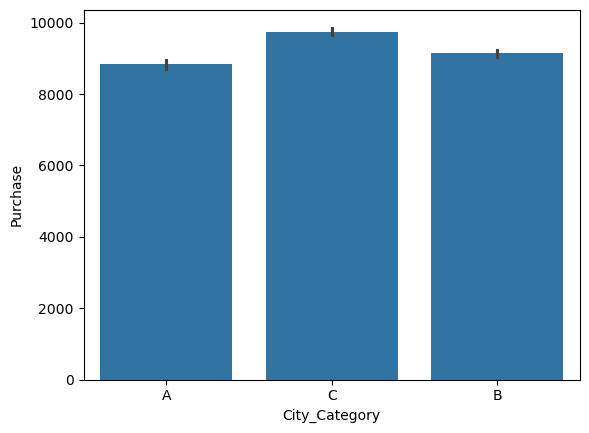

In [43]:
sns.barplot(x = df['City_Category'] , y =df['Purchase'])
plt.show()

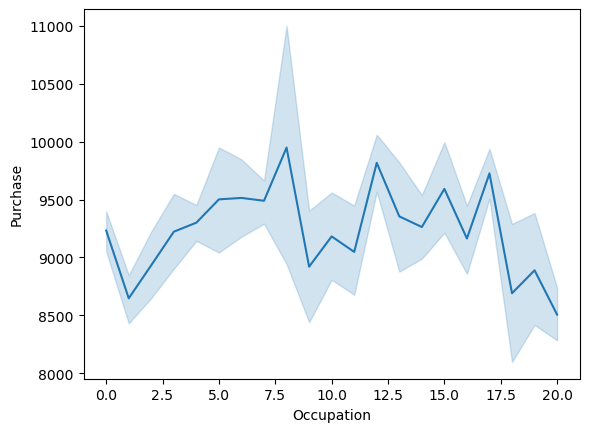

In [44]:
sns.lineplot(x= df['Occupation'] , y= df['Purchase'])
plt.show()

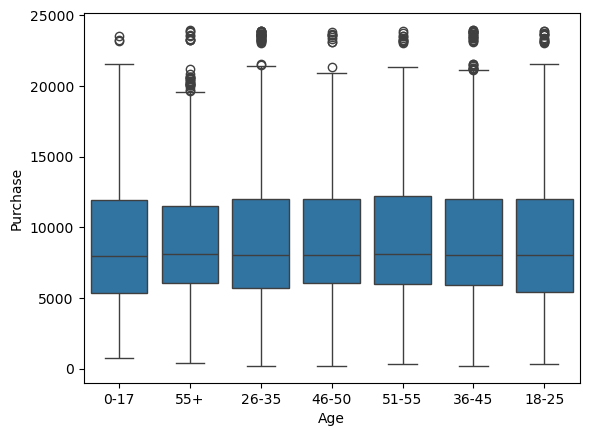

In [45]:
sns.boxplot(x=df['Age'],y=df['Purchase'])
plt.show()

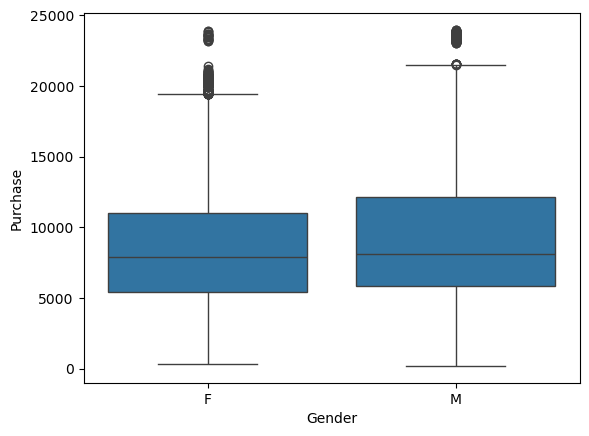

In [46]:
sns.boxplot(x=df['Gender'],y=df['Purchase'])
plt.show()

## Multi-Variate Analysis

In [47]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

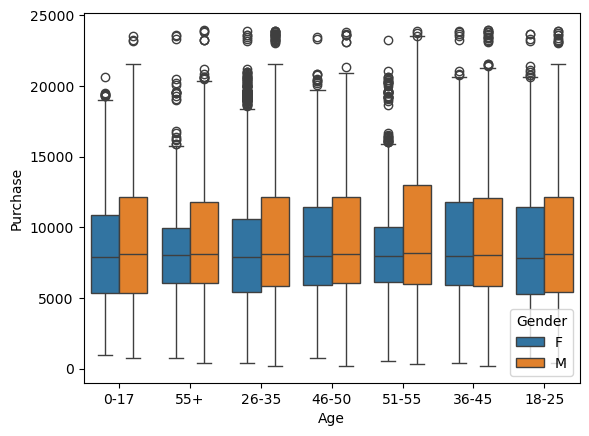

In [48]:
sns.boxplot(x=df['Age'],y=df['Purchase'],hue=df['Gender'])
plt.show()

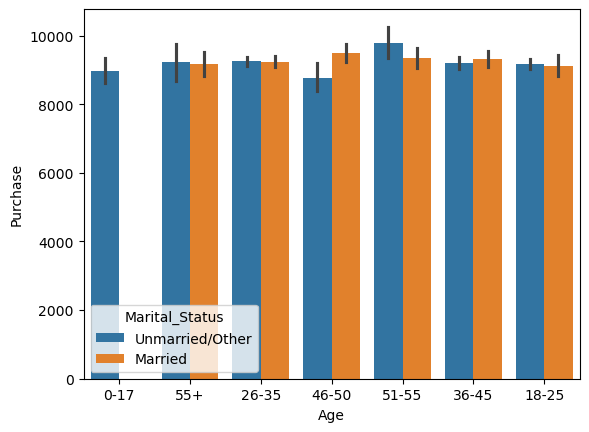

In [49]:
sns.barplot(x=df['Age'] , y=df['Purchase'] , hue=df['Marital_Status'].replace({1.0:"Married" , 0.0:"Unmarried/Other"}))
plt.show()

In [50]:
df['Product_Category'].value_counts().index

Index([ 5.0,  1.0,  8.0, 11.0,  2.0,  3.0,  6.0,  4.0, 16.0, 15.0, 13.0, 10.0,
       12.0,  7.0, 18.0, 14.0, 17.0,  9.0],
      dtype='float64', name='Product_Category')

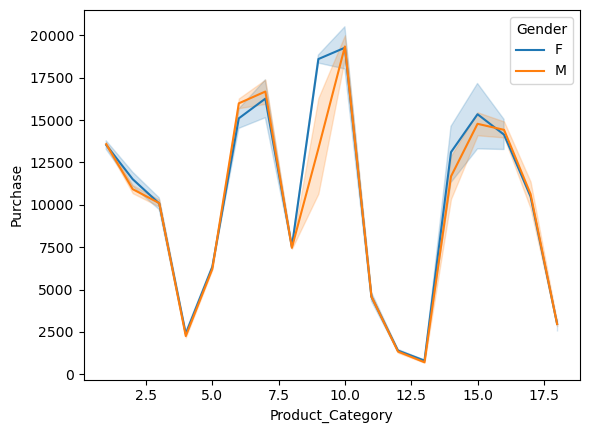

In [51]:
sns.lineplot(x=df['Product_Category'] , y=df['Purchase'] ,hue=df['Gender'])
plt.show()

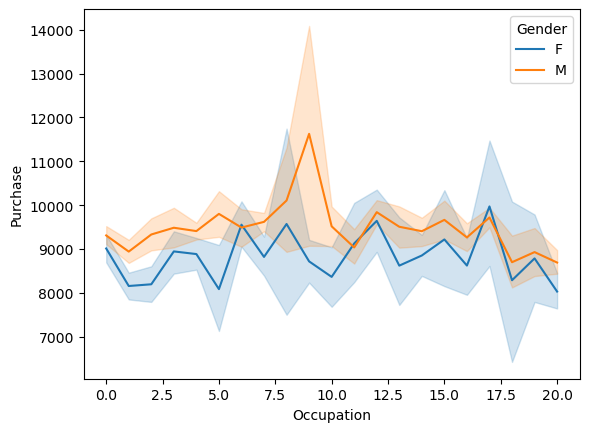

In [52]:
sns.lineplot(x=df['Occupation'] , y=df['Purchase'] ,hue=df['Gender'])
plt.show()

## CLT and Confidence Interval

### How does gender affect the amount spent?

In [53]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [54]:
df.groupby(['Gender'])['User_ID'].nunique()

Gender
F     906
M    2482
Name: User_ID, dtype: int64

We can observe that we have 906 Female users and 2482 Male users from the given data sample.

In [55]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,5897.0,8730.292691,4650.481341,347.0,5451.0,7916.0,11030.0,23910.0
M,19139.0,9398.277287,5011.996624,186.0,5871.0,8088.0,12123.5,23958.0


**Checking for 95% Confidence based on sample data if Gender affect Amount spent**

*(The z-score for a 95% confidence interval is 1.96.)*

In [56]:
print("Male Confidence Interval based on sample data: ")
df[df['Gender']=='M']['Purchase'].mean() + (1.96 * df[df['Gender']=='M']['Purchase'].std()) , df[df['Gender']=='M']['Purchase'].mean() - (1.96 * df[df['Gender']=='M']['Purchase'].std())

Male Confidence Interval based on sample data: 


(19221.790670650335, -425.2360962211569)

In [57]:
print("Female Confidence Interval based on sample data: ")
df[df['Gender']=='F']['Purchase'].mean() + (1.96 * df[df['Gender']=='F']['Purchase'].std()) , df[df['Gender']=='F']['Purchase'].mean() - (1.96 * df[df['Gender']=='F']['Purchase'].std())

Female Confidence Interval based on sample data: 


(17845.236119129688, -384.65073673185725)

Since there is a clear Overlap in the Limits we cannot say for sure wheter the M or F spend more

**Checking for 95% Confidence: Sample Sizes(300/3000)**

In [58]:
# For N = 300
male_mean_purchase = [df[df['Gender']=='M']['Purchase'].sample(300 , replace=True).mean() for i in range(5000)]
male_mean_purchase

[9006.116666666667,
 9441.293333333333,
 9322.003333333334,
 9098.92,
 9466.923333333334,
 9660.453333333333,
 9364.806666666667,
 9200.03,
 9392.33,
 9411.086666666666,
 9232.846666666666,
 9655.956666666667,
 9579.846666666666,
 9737.1,
 9121.663333333334,
 9221.83,
 9546.37,
 9131.103333333333,
 9021.6,
 9363.44,
 8875.883333333333,
 9664.003333333334,
 9239.586666666666,
 9605.323333333334,
 9479.686666666666,
 9480.423333333334,
 9783.576666666666,
 8860.95,
 9400.766666666666,
 8906.186666666666,
 9519.88,
 9562.803333333333,
 9589.64,
 9158.753333333334,
 9273.476666666667,
 9349.65,
 9265.693333333333,
 9657.973333333333,
 10026.433333333332,
 9783.113333333333,
 9665.926666666666,
 9502.026666666667,
 9631.41,
 9541.486666666666,
 9927.246666666666,
 9212.086666666666,
 9273.213333333333,
 9327.49,
 9823.85,
 9169.083333333334,
 9136.95,
 9999.87,
 9459.496666666666,
 9458.386666666667,
 9115.813333333334,
 9391.273333333333,
 9287.196666666667,
 8980.336666666666,
 9455.93,
 

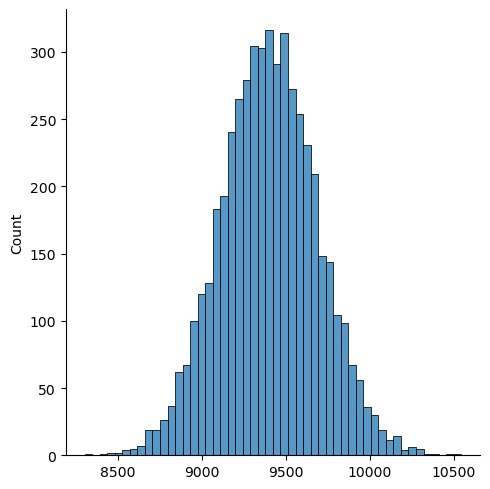

In [59]:
sns.displot(male_mean_purchase)

In [60]:
np.std(male_mean_purchase)

287.6273962785107

In [61]:
np.mean(male_mean_purchase)

9398.504634666666

In [136]:
print("Male Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(male_mean_purchase) + np.std(male_mean_purchase) , np.mean(male_mean_purchase) - (1.96 * np.std(male_mean_purchase))

Male Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9490.841383769002, 9220.354233226091)

In [63]:
# For N = 300
female_mean_purchase = [df[df['Gender']=='F']['Purchase'].sample(300 , replace=True).mean() for i in range(5000)]
female_mean_purchase

[9085.003333333334,
 8746.346666666666,
 8949.006666666666,
 8601.183333333332,
 8560.393333333333,
 9560.69,
 8961.353333333333,
 8937.373333333333,
 9023.39,
 9139.203333333333,
 8456.77,
 8564.183333333332,
 8911.823333333334,
 8262.096666666666,
 9089.036666666667,
 8954.043333333333,
 8935.323333333334,
 8715.676666666666,
 8520.916666666666,
 8337.883333333333,
 8697.443333333333,
 8746.553333333333,
 8562.78,
 9120.933333333332,
 9135.556666666667,
 8544.366666666667,
 8724.14,
 8666.81,
 8912.163333333334,
 8854.11,
 8875.823333333334,
 8421.286666666667,
 8388.893333333333,
 9039.593333333334,
 8964.316666666668,
 8214.896666666667,
 8760.663333333334,
 8619.926666666666,
 9038.046666666667,
 9012.883333333333,
 8305.133333333333,
 9186.28,
 8502.766666666666,
 9119.283333333333,
 9005.156666666666,
 8809.863333333333,
 8793.906666666666,
 8685.016666666666,
 8770.48,
 8605.226666666667,
 8236.25,
 8885.356666666667,
 9008.66,
 8714.14,
 8482.283333333333,
 8801.576666666666,


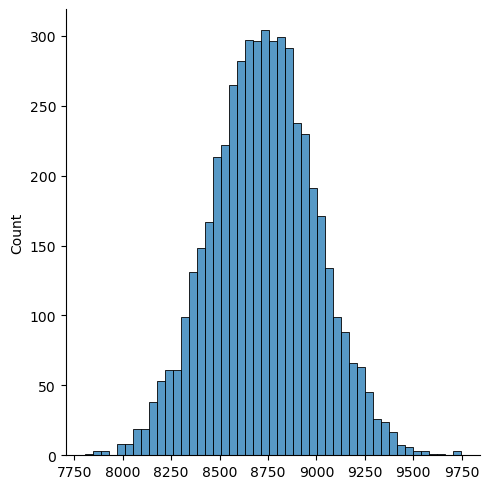

In [64]:
sns.displot(female_mean_purchase)

In [65]:
np.mean(female_mean_purchase)

8727.910225999998

In [66]:
np.std(female_mean_purchase)

268.6775572853826

In [137]:
print("Female Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(female_mean_purchase) + np.std(female_mean_purchase) , np.mean(female_mean_purchase) - (1.96 * np.std(female_mean_purchase))

Female Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(8815.297047888433, 8564.90100157867)

*Since there is Overlap we cannot confirm if the gender affects the amount spend*

In [68]:
# For N = 3000

In [69]:
male_mean_purchase = [df[df['Gender']=='M']['Purchase'].sample(3000 , replace=True).mean() for i in range(5000)]

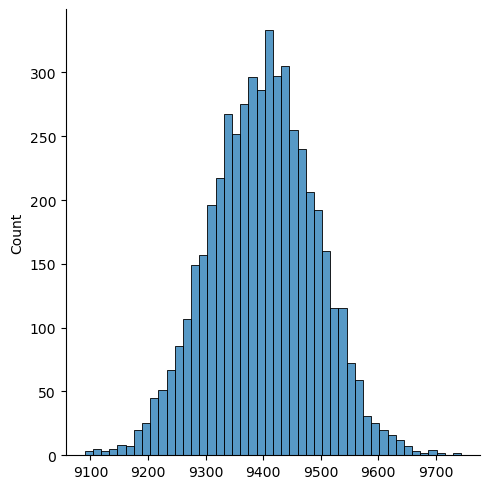

In [70]:
sns.displot(male_mean_purchase)

In [71]:
female_mean_purchase = [df[df['Gender']=='F']['Purchase'].sample(3000 , replace=True).mean() for i in range(5000)]

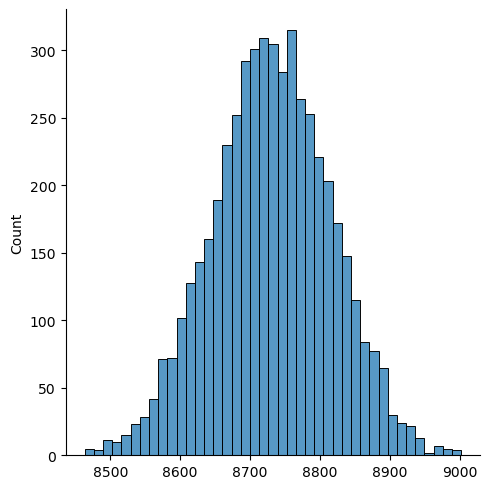

In [72]:
sns.displot(female_mean_purchase)

In [73]:
np.mean(male_mean_purchase)

9399.460589666667

In [74]:
np.std(male_mean_purchase)

91.38079410233497

In [75]:
np.mean(female_mean_purchase)

8730.703789

In [76]:
np.std(female_mean_purchase)

84.5932588884333

In [138]:
print("Male Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(male_mean_purchase) + np.std(male_mean_purchase) , np.mean(male_mean_purchase) - (1.96 * np.std(male_mean_purchase))

Male Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9490.841383769002, 9220.354233226091)

In [139]:
print("Female Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(female_mean_purchase) + np.std(female_mean_purchase) , np.mean(female_mean_purchase) - (1.96 * np.std(female_mean_purchase))

Female Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(8815.297047888433, 8564.90100157867)

**Since there is no Overlap in the Limits and clearly we can see that the Amount spend by M is more that F**

### How does Marital_Status affect the amount spent?

In [79]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [80]:
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0.0    1988
1.0    1400
Name: User_ID, dtype: int64

We can observe that from the sample data we have 1988 users with Marital_status 0 (Unmarried/Other) and 1400 users with Marital_Status as 1 (Married)

In [81]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,15033.0,9209.872281,4965.917592,186.0,5469.0,8026.0,11991.0,23929.0
1.0,10003.0,9287.629211,4893.816578,187.0,5905.0,8071.0,12006.5,23958.0


**Checking for 95% Confidence based on sample data if Marital_Status affect Amount spent**

*(The z-score for a 95% confidence interval is 1.96.)*

In [82]:
print("Married Confidence Interval based on sample data: ")
df[df['Marital_Status']==1.0]['Purchase'].mean() + (1.96 * df[df['Marital_Status']==1.0]['Purchase'].std()) , df[df['Marital_Status']==1.0]['Purchase'].mean() - (1.96 * df[df['Marital_Status']==1.0]['Purchase'].std())

Married Confidence Interval based on sample data: 


(18879.509705022985, -304.2512825497288)

In [83]:
print("Unmarried/Other Confidence Interval based on sample data: ")
df[df['Marital_Status']==0.0]['Purchase'].mean() + (1.96 * df[df['Marital_Status']==0.0]['Purchase'].std()) , df[df['Marital_Status']==0.0]['Purchase'].mean() - (1.96 * df[df['Marital_Status']==0.0]['Purchase'].std())

Unmarried/Other Confidence Interval based on sample data: 


(18943.070761430175, -523.3261994664972)

Since there is an Overlap we cannot say if married or unmarried people spend more

**Checking for 95% Confidence: Sample Sizes(300/3000)**

In [84]:
married_sample_mean = [df[df['Marital_Status']==1.0]['Purchase'].sample(300 , replace = True).mean() for i in range(5000)]

In [85]:
unmarried_sample_mean = [df[df['Marital_Status']==0.0]['Purchase'].sample(300 , replace = True).mean() for i in range(5000)]

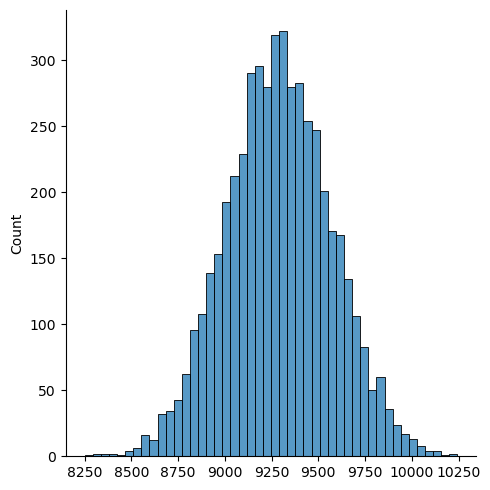

In [86]:
sns.displot(married_sample_mean)

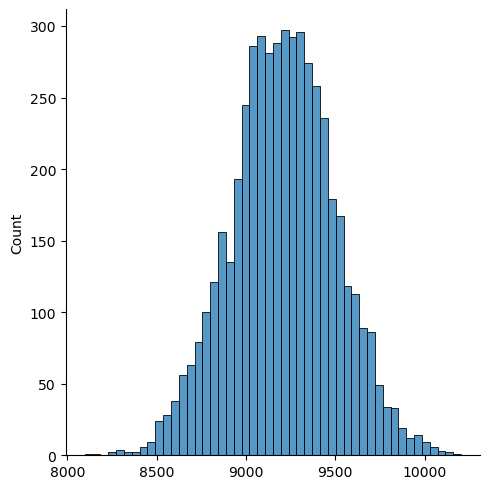

In [87]:
sns.displot(unmarried_sample_mean)

In [140]:
print("Married Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(married_sample_mean) + np.std(married_sample_mean) , np.mean(married_sample_mean) - (1.96 * np.std(married_sample_mean))

Married Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9376.03129722067, 9112.773222903488)

In [141]:
print("Unmarried Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(unmarried_sample_mean) + np.std(unmarried_sample_mean) , np.mean(unmarried_sample_mean) - (1.96 * np.std(unmarried_sample_mean))

Unmarried Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9301.445164784547, 9034.509979859627)

*Since there is an Overlap we cannot confirm if Marital_Status affects amount spend*

In [90]:
married_sample_mean = [df[df['Marital_Status']==1.0]['Purchase'].sample(3000 , replace = True).mean() for i in range(5000)]

In [91]:
unmarried_sample_mean = [df[df['Marital_Status']==0.0]['Purchase'].sample(3000 , replace = True).mean() for i in range(5000)]

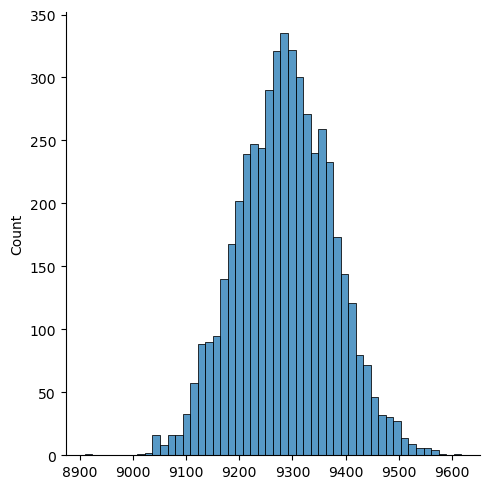

In [92]:
sns.displot(married_sample_mean)

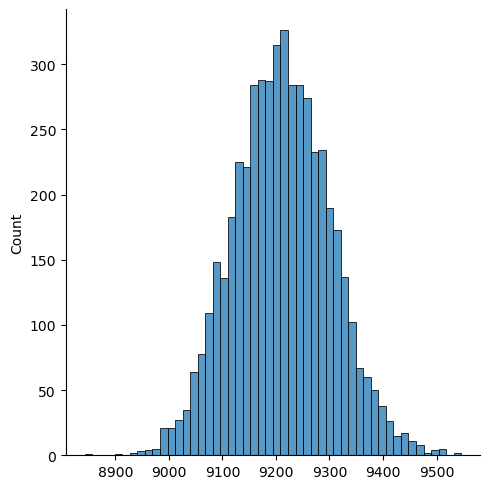

In [93]:
sns.displot(unmarried_sample_mean)

In [143]:
print("Married Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(married_sample_mean) + np.std(married_sample_mean) , np.mean(married_sample_mean) - (1.96 * np.std(married_sample_mean))

Married Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9376.03129722067, 9112.773222903488)

In [142]:
print("Unmarried Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(unmarried_sample_mean) + np.std(unmarried_sample_mean) , np.mean(unmarried_sample_mean) - (1.96 * np.std(unmarried_sample_mean))

Unmarried Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9301.445164784547, 9034.509979859627)

**Since there is No Overlap we can confirm that the amount spend is not affecetd by the Marital_Status of the User.**

### How does Age affect the amount spent?

In [96]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [97]:
df.groupby('Age')['User_ID'].nunique()

Age
0-17      134
18-25     673
26-35    1167
36-45     659
46-50     273
51-55     272
55+       210
Name: User_ID, dtype: int64

In [98]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,699.0,8973.606581,5029.623861,724.0,5361.50,7974.0,11931.50,23562.0
18-25,5100.0,9159.605686,4988.224069,347.0,5410.75,8030.5,12021.25,23889.0
26-35,9826.0,9251.373194,4956.597132,189.0,5720.25,8041.5,12001.75,23913.0
36-45,4839.0,9257.016326,4911.226845,205.0,5878.50,8033.0,11985.50,23929.0
46-50,1844.0,9286.909436,4758.498542,186.0,6035.00,8048.5,11992.75,23824.0
51-55,1738.0,9459.326812,5036.403156,347.0,5993.75,8087.5,12201.75,23912.0
55+,990.0,9197.534343,4684.355322,399.0,6039.00,8105.5,11468.00,23958.0


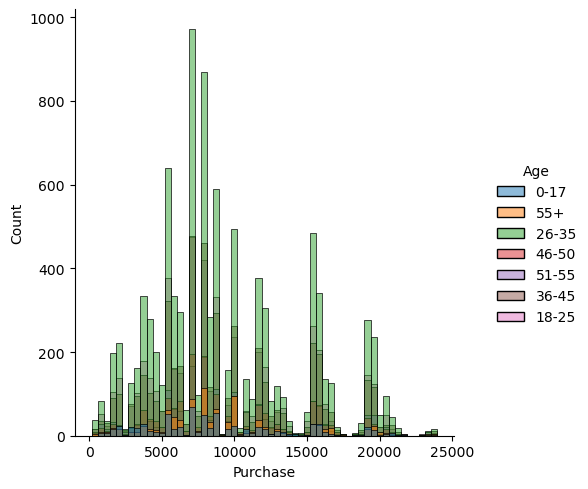

In [99]:
sns.displot(x=df['Purchase'] , data = df , hue=df['Age'])

**Checking for 95% Confidence based on sample data if Age affect Amount spent**

*(The z-score for a 95% confidence interval is 1.96.)*

In [100]:
print("Age (0-17) Confidence Interval based on sample data: ")
df[df['Age']=='0-17']['Purchase'].mean() + (1.96 * df[df['Age']=='0-17']['Purchase'].std()) , df[df['Age']=='0-17']['Purchase'].mean() - (1.96 * df[df['Age']=='0-17']['Purchase'].std())

Age (0-17) Confidence Interval based on sample data: 


(18831.66934866266, -884.4561870031466)

In [101]:
print("Age (18-25) Confidence Interval based on sample data: ")
df[df['Age']=='18-25']['Purchase'].mean() + (1.96 * df[df['Age']=='18-25']['Purchase'].std()) , df[df['Age']=='18-25']['Purchase'].mean() - (1.96 * df[df['Age']=='18-25']['Purchase'].std())

Age (18-25) Confidence Interval based on sample data: 


(18936.524861144164, -617.3134885951422)

In [102]:
print("Age (26-35) Confidence Interval based on sample data: ")
df[df['Age']=='26-35']['Purchase'].mean() + (1.96 * df[df['Age']=='26-35']['Purchase'].std()) , df[df['Age']=='26-35']['Purchase'].mean() - (1.96 * df[df['Age']=='26-35']['Purchase'].std())

Age (26-35) Confidence Interval based on sample data: 


(18966.303572420104, -463.55718528393663)

In [103]:
print("Age (36-45) Confidence Interval based on sample data: ")
df[df['Age']=='36-45']['Purchase'].mean() + (1.96 * df[df['Age']=='36-45']['Purchase'].std()) , df[df['Age']=='36-45']['Purchase'].mean() - (1.96 * df[df['Age']=='36-45']['Purchase'].std())

Age (36-45) Confidence Interval based on sample data: 


(18883.020941326227, -368.98828995197437)

In [104]:
print("Age (46-50) Confidence Interval based on sample data: ")
df[df['Age']=='46-50']['Purchase'].mean() + (1.96 * df[df['Age']=='46-50']['Purchase'].std()) , df[df['Age']=='46-50']['Purchase'].mean() - (1.96 * df[df['Age']=='46-50']['Purchase'].std())

Age (46-50) Confidence Interval based on sample data: 


(18613.566577456557, -39.747705439205674)

In [105]:
print("Age (51-55) Confidence Interval based on sample data: ")
df[df['Age']=='51-55']['Purchase'].mean() + (1.96 * df[df['Age']=='51-55']['Purchase'].std()) , df[df['Age']=='51-55']['Purchase'].mean() - (1.96 * df[df['Age']=='51-55']['Purchase'].std())

Age (51-55) Confidence Interval based on sample data: 


(19330.6769988631, -412.0233740069398)

In [106]:
print("Age (55+) Confidence Interval based on sample data: ")
df[df['Age']=='55+']['Purchase'].mean() + (1.96 * df[df['Age']=='55+']['Purchase'].std()) , df[df['Age']=='55+']['Purchase'].mean() - (1.96 * df[df['Age']=='55+']['Purchase'].std())

Age (55+) Confidence Interval based on sample data: 


(18378.870774172065, 16.197912696619824)

Since there is an Overlap we cannot confirm if any particular age group is spending more.

**Checking for 95% Confidence: Sample Sizes(300/3000)**

In [107]:
age0_17_mean_sample = [df[df['Age']=='0-17']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [108]:
age18_25_mean_sample = [df[df['Age']=='18-25']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [109]:
age26_35_mean_sample = [df[df['Age']=='26-35']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [110]:
age36_45_mean_sample = [df[df['Age']=='36-45']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [111]:
age46_50_mean_sample = [df[df['Age']=='46-50']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [112]:
age51_55_mean_sample = [df[df['Age']=='51-55']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [113]:
age_55plus_mean_sample = [df[df['Age']=='55+']['Purchase'].sample(300 , replace= True).mean() for i in range(5000)]

In [144]:
print("Age - (0-17) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age0_17_mean_sample) + np.std(age0_17_mean_sample) , np.mean(age0_17_mean_sample) - (1.96 * np.std(age0_17_mean_sample))

Age - (0-17) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9066.403800815116, 8792.321874189038)

In [145]:
print("Age - (18-25) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age18_25_mean_sample) + np.std(age18_25_mean_sample) , np.mean(age18_25_mean_sample) - (1.96 * np.std(age18_25_mean_sample))

Age - (18-25) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9252.498807129263, 8983.847361679978)

In [146]:
print("Age - (26-35) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age26_35_mean_sample) + np.std(age26_35_mean_sample) , np.mean(age26_35_mean_sample) - (1.96 * np.std(age26_35_mean_sample))

Age - (26-35) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9343.212748223194, 9074.063318607878)

In [147]:
print("Age - (36-45) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age36_45_mean_sample) + np.std(age36_45_mean_sample) , np.mean(age36_45_mean_sample) - (1.96 * np.std(age36_45_mean_sample))

Age - (36-45) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9540.184170397608, 8689.037365060687)

In [148]:
print("Age - (46-50) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age46_50_mean_sample) + np.std(age46_50_mean_sample) , np.mean(age46_50_mean_sample) - (1.96 * np.std(age46_50_mean_sample))

Age - (46-50) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9371.532955858369, 9121.897156037596)

In [149]:
print("Age - (51-55) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age51_55_mean_sample) + np.std(age51_55_mean_sample) , np.mean(age51_55_mean_sample) - (1.96 * np.std(age51_55_mean_sample))

Age - (51-55) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9548.830897920929, 9278.237923376315)

In [150]:
print("Age - (55+) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): ")
np.mean(age_55plus_mean_sample) + np.std(age_55plus_mean_sample) , np.mean(age_55plus_mean_sample) - (1.96 * np.std(age_55plus_mean_sample))

Age - (55+) Confidence Interval based on sample size (300 with Replacement) for 5000 (iteration): 


(9467.13724537968, 8677.932010842498)

In [121]:
age0_17_mean_sample = [df[df['Age']=='0-17']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [151]:
print("Age - (0-17) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age0_17_mean_sample) + np.std(age0_17_mean_sample) , np.mean(age0_17_mean_sample) - (1.96 * np.std(age0_17_mean_sample))

Age - (0-17) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9066.403800815116, 8792.321874189038)

In [123]:
age18_25_mean_sample = [df[df['Age']=='18-25']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [152]:
print("Age - (18-25) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age18_25_mean_sample) + np.std(age18_25_mean_sample) , np.mean(age18_25_mean_sample) - (1.96 * np.std(age18_25_mean_sample))

Age - (18-25) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9252.498807129263, 8983.847361679978)

In [125]:
age26_35_mean_sample = [df[df['Age']=='26-35']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [153]:
print("Age - (26-35) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age26_35_mean_sample) + np.std(age26_35_mean_sample) , np.mean(age26_35_mean_sample) - (1.96 * np.std(age26_35_mean_sample))

Age - (26-35) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9343.212748223194, 9074.063318607878)

In [127]:
age36_45_mean_sample = [df[df['Age']=='36-45']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [154]:
print("Age - (36-45) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age36_45_mean_sample) + np.std(age36_45_mean_sample) , np.mean(age36_45_mean_sample) - (1.96 * np.std(age36_45_mean_sample))

Age - (36-45) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9540.184170397608, 8689.037365060687)

In [129]:
age46_50_mean_sample = [df[df['Age']=='46-50']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [155]:
print("Age - (46-50) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age46_50_mean_sample) + np.std(age46_50_mean_sample) , np.mean(age46_50_mean_sample) - (1.96 * np.std(age46_50_mean_sample))

Age - (46-50) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9371.532955858369, 9121.897156037596)

In [131]:
age51_55_mean_sample = [df[df['Age']=='51-55']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [156]:
print("Age - (51-55) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age51_55_mean_sample) + np.std(age51_55_mean_sample) , np.mean(age51_55_mean_sample) - (1.96 * np.std(age51_55_mean_sample))

Age - (51-55) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9548.830897920929, 9278.237923376315)

In [133]:
age_55plus_mean_sample = [df[df['Age']=='55+']['Purchase'].sample(3000 , replace= True).mean() for i in range(5000)]

In [157]:
print("Age - (55+) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): ")
np.mean(age_55plus_mean_sample) + np.std(age_55plus_mean_sample) , np.mean(age_55plus_mean_sample) - (1.96 * np.std(age_55plus_mean_sample))

Age - (55+) Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteration): 


(9467.13724537968, 8677.932010842498)

From the above experiment we cannot confirm clearly users Age that spend the most

## Recommendations :

We could observe with the sample data given that mean Product category for users throughout the Age Group is 5.<br>
Also we could observe certain outliers with Age 55+ when doin Bi-Variate Analysis.(Product Category Vs. Age
<br>


We could observe similar tends when doing Bi-Variate Analysis for Product Category Vs. Gend<br>r. The Mean category w5s 9 and some outliers were observed for Female User<br>
.

When conducting Multivariate Analysis (Age Vs. Purchase Vs. Marital_Status) we observed that the amount spent by Married Individual were similar to Unmarried/Other us<br>
- rs.

To Check if there was any relation with the purchase amount Vs. gender we did experiments with (300/3000) sample size(users) and could see that since there is no Overlap in the Limits and clearly we can see that the Amount spend by M is more <br>h    - at F.

Male Confidence Interval based on sample size (3000 with Replacement) for 5000 (iteation): 
(9490.84 1383769002, 9220.354<br>3    - 3226091)

Female Confidence Interval based on sample size (3000 with Replacement) for 5000 (teration): 
(8815 .297047888433, 8564<br>.<br>90100157867)

Sadly we could not observe any such patterns among the Marital_Status Vs. Purchase analysis. As the Critical values obtained from the  maple data and by bootstrapping for  00/3000 users.
We could see <br>c- lear overlaps.

From the above experiment we cannot confirm clearly users Age tht spend the most.
However we have observed high critical values for different age groups with little stan<br>r     - d deviation like 

Age - (26-35) Confidence Interval based on sample size (3000 with Replacement) fr 5000 (iteration) : 
(9343.2127482231<br>4     - , 9074.063318607878)

Age - (46-50) Confidence Interval based on sample size (3000 with Replacement for 5000 (iterati on): 
(9371.5329558<br>8     - 369, 9121.897156037596)

Age - (51-55) Confidence Interval based on sample size (3000 with Replacemnt) for 5000 (iter ation): 
(9548.8308<br>
9<br>
<br>
7**920929, 9278.237923376315)

We can recommed the Business team to focus on Prioritizing Male users as they end up spending more during Black Friday Sales.
Also the Business team can hook on different age groups that hive high spending.**threshold like mentioned above.